In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np 
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding,RNN, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Softcom/Assignment 3/Dataset 3.csv',encoding="ISO-8859-1")
dataset

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [6]:
dataset['tweets'] = dataset['tweets'].apply(lambda x: x.lower())

In [12]:
dataset

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat need to send em to my accountant tomorr...,0
4,add me on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression everyon...,1


In [7]:
dataset['tweets'] = dataset['tweets'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [8]:
dataset

,tweets,sentiment
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat need to send em to my accountant tomorr...,0
4,add me on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression everyon...,1


In [10]:
sentence_length = []
from collections import Counter
count = Counter()
for i in dataset.tweets:
  temp = i.split()
  sentence_length.append(len(temp))
  for j in temp:
    count[j] += 1

In [11]:
num_words = len(count)
max_length = max(sentence_length)
print('num_words: ',num_words,' max_length: ',max_length)

num_words:  23518  max_length:  69


In [13]:
train_text,test_text,train_label,test_label=train_test_split(dataset['tweets'],dataset['sentiment'],test_size=0.20,random_state=1)

In [14]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(dataset['tweets'])
word_index = tokenizer.word_index

In [15]:
train_text = tokenizer.texts_to_sequences(train_text)
test_text = tokenizer.texts_to_sequences(test_text)

In [16]:
train_padding = pad_sequences(
    train_text, maxlen=max_length, padding='post', truncating='post'
)
test_padding = pad_sequences(
    test_text, maxlen=max_length, padding='post', truncating='post'
)

In [17]:
print(len(train_padding))
print(len(test_padding))

8251
2063


In [18]:
lr = 0.0001
epoch_num = 5
unit1 = 64
unit2 = 128
unit3 = 256
embedding_output = 32

In [19]:
def rnn_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_output,input_length=max_length),
    tf.keras.layers.SimpleRNN(unit1, return_sequences=True,activation='relu'),
    tf.keras.layers.SimpleRNN(unit2, return_sequences=True,activation='relu'),
    tf.keras.layers.SimpleRNN(unit3),
    tf.keras.layers.Dense(1,activation='sigmoid'),
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
  return model

In [20]:
import tensorflow as tf
model = rnn_model()

rnn_model_result = model.fit(
     train_padding, train_label, epochs=epoch_num, verbose=2,
     validation_data = (test_padding,test_label))

Epoch 1/5
258/258 - 34s - loss: 0.4559 - true_positives: 510.0000 - true_negatives: 6279.0000 - false_positives: 113.0000 - false_negatives: 1349.0000 - accuracy: 0.8228 - precision: 0.8186 - recall: 0.2743 - val_loss: 0.3921 - val_true_positives: 193.0000 - val_true_negatives: 1576.0000 - val_false_positives: 32.0000 - val_false_negatives: 262.0000 - val_accuracy: 0.8575 - val_precision: 0.8578 - val_recall: 0.4242
Epoch 2/5
258/258 - 29s - loss: 0.1912 - true_positives: 1475.0000 - true_negatives: 6290.0000 - false_positives: 102.0000 - false_negatives: 384.0000 - accuracy: 0.9411 - precision: 0.9353 - recall: 0.7934 - val_loss: 0.0633 - val_true_positives: 435.0000 - val_true_negatives: 1607.0000 - val_false_positives: 1.0000 - val_false_negatives: 20.0000 - val_accuracy: 0.9898 - val_precision: 0.9977 - val_recall: 0.9560
Epoch 3/5
258/258 - 28s - loss: 0.0667 - true_positives: 1759.0000 - true_negatives: 6377.0000 - false_positives: 15.0000 - false_negatives: 100.0000 - accuracy: 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 69, 32)            752576    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 69, 64)            6208      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 69, 128)           24704     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 256)               98560     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 882,305
Trainable params: 882,305
Non-trainable params: 0
_________________________________________________________________


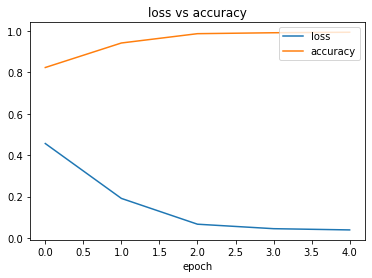

In [22]:
from matplotlib import pyplot
pyplot.plot(rnn_model_result.history['loss'])
pyplot.plot(rnn_model_result.history['accuracy'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 


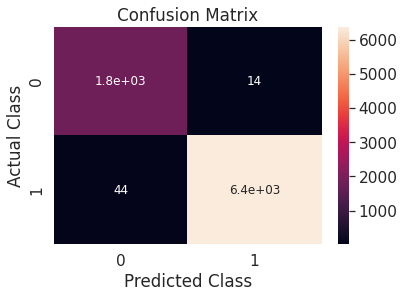

In [23]:
import seaborn as sn
array = [[rnn_model_result.history['true_positives'][-1],rnn_model_result.history['false_positives'][-1]],
         [rnn_model_result.history['false_negatives'][-1],rnn_model_result.history['true_negatives'][-1]]]
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) 
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('Confusion_Matrix.png')
pyplot.show()